In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
from dask.distributed import Client, LocalCluster
import dask.bag as db

In [4]:
dask_cluster = LocalCluster(n_workers=10, threads_per_worker=1)
dask_client = Client(dask_cluster)

C:\tools\miniconda3\envs\tibert\lib\site-packages\distributed\node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55062 instead
  http_address["port"], self.http_server.port


In [5]:
dask_client

Client Scheduler: tcp://127.0.0.1:55065 Dashboard: http://127.0.0.1:55062/status,Cluster Workers: 10 Cores: 10 Memory: 17.10 GB


# Test the loaders

In [6]:
from tibert.data import CorpusSplitType, KangyurLoader, TengyurLoader

## Split by folio - Kangyur

In [7]:
kangyur_bag = KangyurLoader("../../tibert_data/").to_bag(split_type=CorpusSplitType.BY_FOLIO)

In [8]:
kangyur_bag.count().compute()

65619

In [9]:
kangyur_bag.take(10)

('༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། འདུལ་བ་གཞི། བམ་པོ་དང་པོ། དཀོན་མཆོག་གསུམ་ལ་ཕྱག་འཚལ་ལོ། །གང་གིས་འཆིང་ རྣམས་ཡང་དག་རབ་བཅད་ཅིང་། །མུ་སྟེགས་ཚོགས་རྣམས་ཐམས་ཅད་རབ་བཅོམ་སྟེ། །སྡེ་དང་བཅས་པའི་བདུད་རྣམས་ངེས་བཅོམ་ནས། །བྱང་ཆུབ་འདི་བརྙེས་དེ་ལ་ ཕྱག་འཚལ་ལོ། །ཁྱིམ་དོན་ཆེ་ཆུང་སྤངས་ཏེ་དང་པོར་རབ་འབྱུང་དཀའ། །རབ་བྱུང་ཐོབ་ནས་ཡུལ་སྤྱད་དག་གིས་དགའ་ཐོབ་དཀའ། །མངོན་དགའ་ཇི་བཞིན་དོན་བསྐྱེད་ཡང་ དག་བྱེད་པ་དཀའ། །ངུར་སྨྲིག་གོས་འཆང་མཁས་པ་ཚུལ་ལས་ཉམས་པ་དཀའ། །གཞི་རྣམས་ཀྱི་སྤྱི་སྡོམ་ལ། རབ་འབྱུང་གསོ་སྦྱོང་གཞི་དང་ནི། །དགག་དབྱེ་དབྱར་དང་ཀོ་ ལྤགས་གཞི། །སྨན་དང་གོས་དང་སྲ་བརྐྱང་དང་། །ཀཽ་ཤཱམ་བཱི་དང་ལས་ཀྱི་གཞི། །དམར་སེར་ཅན་དང་གང་ཟག་དང་། །སྤོ་དང་གསོ་སྦྱོང་བཞག་པ་དང་། །གནས་མལ་དང་ནི་',
 'རྩོད་པ་དང་། །དགེ་འདུན་དབྱེན་རྣམས་བསྡུས་པ་ཡིན། །རབ་ཏུ་འབྱུང་བའི་གཞིའི་སྤྱི་སྡོམ་ལ། ཤཱ་རིའི་བུ་དང་མུ་སྟེགས་ཅན། །དགེ་ཚུལ་གཉིས་དང་བྱ་རོག་སྐྲོད། །དགྲ་བཅོམ་བསད་དང་ལག་རྡུམ་གྱི། །སྡེ་ཚན་ ཡང་དག་བསྡུས་པ་ཡིན། །སྡོམ་ལ། ཤཱ་རིའི་བུ་དང་རབ་འབྱུང་དང་། །བསྙེན་པར་རྫོགས་པར་གནང་བ་དང་། །ཉེ་སྡེས་ཚོགས་ནི་བསྡུས་པ་དང་། །ལྔ་པའི་སྡེ་ཚན་བསྡུས་པ་ཡིན། །བྱང་ཆུབ་སེམས་དཔའ་དག

In [10]:
kangyur_df = dask_client.persist(KangyurLoader("../../tibert_data/").dataframe)

In [11]:
kangyur_df

,filename,volume_number,location,text
npartitions=103,,,,
,object,int64,object,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [12]:
kangyur_df.head(20)

,filename,volume_number,location,text
0,001_འདུལ་བ།_ཀ.txt,1,F.1.a,
1,001_འདུལ་བ།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། ...
2,001_འདུལ་བ།_ཀ.txt,1,F.2.a,རྩོད་པ་དང་། །དགེ་འདུན་དབྱེན་རྣམས་བསྡུས་པ་ཡིན། ...
3,001_འདུལ་བ།_ཀ.txt,1,F.2.b,ཡུལ་ཨང་ག་ཙམ་པ་མ་གཏོགས་པ་བཅོམ་ནས་ཕྱིར་ལྡོག་པར་བ...
4,001_འདུལ་བ།_ཀ.txt,1,F.3.a,པོ་འདི་ནི་གདུག་པ། ཕ་རོལ་གནོན་པ། དཔུང་དང་མཐུ་ཆེ...
5,001_འདུལ་བ།_ཀ.txt,1,F.3.b,ཁྱུད་མཐའ་ཡས་ཀྱི་བུ་བཙས་སོ། །ཀཽ་ཤཱམ་བཱིར་ནི་རྒྱ...
6,001_འདུལ་བ།_ཀ.txt,1,F.4.a,གི་བུ་འདིའི་མཐུ་ཡིན་ནོ་སྙམ་མོད་ཀྱི། དེ་ནི་དེ་ལ...
7,001_འདུལ་བ།_ཀ.txt,1,F.4.b,དང་། གཅད་པ་དང་། དྲལ་བ་དང་། དབུག་པ་དང་། གནས་ལྔ་...
8,001_འདུལ་བ།_ཀ.txt,1,F.5.a,ཡང་བསྡུ་བར་བརྩམས་ཏེ། དེ་དག་འོངས་ནས་ཕྱིར་ལྡོག་པ...
9,001_འདུལ་བ།_ཀ.txt,1,F.5.b,རྒྱལ་པོ་རྒྱལ་རིགས་སྤྱི་བོར་དབང་བསྐུར་བ་ལགས་ན། ...


In [13]:
kangyur_df.text.map(len).max().compute()

481163

In [14]:
kangyur_df[kangyur_df.text.map(len) == 481163].compute()

,filename,volume_number,location,text
0,103_དཀར་ཆག.txt,103,F.1.a,༄༅། །དཀར་ཆག་བཞུགས་སོ།། ༄༅། །བཔཱུརཱུཔཾམདྷྱེདྭིག...


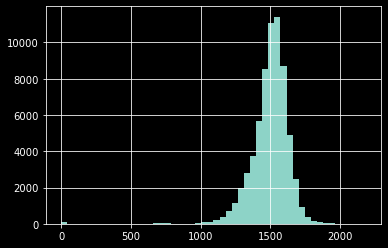

In [15]:
kangyur_df[kangyur_df.text.map(len) < 481163].text.map(len).compute().hist(bins=50)

In [16]:
set(kangyur_df.volume_number.unique().compute().to_list()).symmetric_difference(set(range(1, 104)))

set()

## Split by folio - Tengyur

In [17]:
tengyur_bag = TengyurLoader("../../tibert_data/").to_bag(split_type=CorpusSplitType.BY_FOLIO)

In [18]:
tengyur_bag.count().compute()

128398

In [19]:
tengyur_bag.take(10)

('༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ཤིཥྚ་སྟ་བཿ། བོད་སྐད་དུ། ཁྱད་པར་དུ་འཕགས་པའི་བསྟོད་པ། དེ་བཞིན་གཤེགས་པ་ཐམས་ཅད་ལ་ཕྱག་འཚལ་ལོ། །བདག་ནི་སྟོན་པ་གཞན་ སྤངས་ནས། །བཅོམ་ལྡན་ཁྱོད་ལ་སྐྱབས་མཆིས་པ། །དེ་ཅིའི་སླད་དུ་ཞེ་ན་ཁྱོད། །སྐྱོན་མི་མངའ་ལ་ཡོན་ཏན་ལྡན། །གང་ཕྱིར་འཇིག་རྟེན་སྐྱོན་ལ་དགའ། །ཡོན་ཏན་འཛིན་པར་ཞེན་པས་ན། །སྐྱོན་ ཡང་ཡོན་ཏན་ལྟར་མཐོང་ནས། །གཞན་ལ་སྐྱབས་སུ་མཆིས་པར་གྱུར། །ཁྱབ་འཇུག་དབང་ཕྱུག་ལ་སོགས་པ། །དེ་ལ་སྐྱེ་བོ་དགའ་དད་པས། །དེ་ཡི་ཡོན་ཏན་གང་བསྒྲགས་པ། །ཁྱོད་ཀྱི་བསྟན་ལ་དེ་ དག་སྐྱོན། །ལྷ་ཆེན་ཁྲོས་པའི་མདའ་གཅིག་གིས། །གྲོང་ཁྱེར་སུམ་བརྩེགས་བསྲེགས་ཞེས་གདའ། །ཁྱོད་ཀྱི་ཡེ་ཤེས་མདའ་ཆེན་གྱིས། །ཁྲོ་བའི་སེམས་ཉིད་ངེས་པར་བསྲེགས། །ལྷ་ཆེན་གྱིས་ནི་ འདོད་པ་དག །བསྲེགས་ཉེས་པས་ན་ཕྱིར་ཡང་དྲངས། །ཁྱོད་ཀྱི་ཡེ་ཤེས་ཞུགས་ཀྱིས་ནི། །འདོད་པ་རྩད་བཅད་བསྲེགས་ནས་བཏོན། །ལྷ་ཆེན་ཐིག་ལེའི་མཆོག་མ་ལ། །ཆགས་པ་སྐྱེས་པས་གདོང་',
 'བཞི་བྱུང་། །བདུད་ཀྱི་བུ་མོ་སྒེག་མོ་ཡིས། །ཁྱོད་ཀྱི་བ་སྤུའི་རྩེ་མ་གཡོས། །ལྷ་ཆེན་ཕྱེད་ནི་ཆུང་མ་བས། །ངུར་པ་ཡིས་ཀྱང་ཐུབ་མ་ལགས། །ཁྱོད་ནི་བདེ་བར་བགྱིད་པ་ཡི། །འདོད་པ་ཉིད་ཀྱིས་རྨོངས་མ་ གྱུར། །འཁོར་ལོ་མདུང་ཐུང་ཅན་དག་གིས། །བདུད་སྟོབས་དེ་ལས་རྒྱ

In [20]:
tengyur_df = dask_client.persist(TengyurLoader("../../tibert_data/").dataframe)

In [21]:
tengyur_df

,filename,volume_number,location,text
npartitions=107,,,,
,object,int64,object,object
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


In [22]:
tengyur_df.head(20)

,filename,volume_number,location,text
0,001_བསྟོད་ཚོགས།_ཀ.txt,1,F.1.a,
1,001_བསྟོད་ཚོགས།_ཀ.txt,1,F.1.b,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ཤིཥྚ་སྟ་བཿ། བོད་སྐད་དུ...
2,001_བསྟོད་ཚོགས།_ཀ.txt,1,F.2.a,བཞི་བྱུང་། །བདུད་ཀྱི་བུ་མོ་སྒེག་མོ་ཡིས། །ཁྱོད་...
3,001_བསྟོད་ཚོགས།_ཀ.txt,1,F.2.b,དེ་ཡང་ལས་ལས་སྐྱེས་ཞེས་བསྟན། །བརྒྱ་བྱིན་གྱིས་ནི...
4,001_བསྟོད་ཚོགས།_ཀ.txt,1,F.3.a,ཁྱོད་ནི་ཐུགས་ཀྱི་དཀའ་ཐུབ་ཀྱིས། །མདུད་པ་འཇིག་པར...
5,001_བསྟོད་ཚོགས།_ཀ.txt,1,F.3.b,པ་བརྒྱ་བྱིན་སྒྲོགས་པར་གྱུར། །ཁྱབ་འཇུག་དག་ནི་ནག...
6,001_བསྟོད་ཚོགས།_ཀ.txt,1,F.4.a,པ་ཟེར། །མགོན་པོ་ཁྱོད་ཀྱིས་གནས་སྐབས་དེའི། །སེམས...
7,001_བསྟོད་ཚོགས།_ཀ.txt,1,F.4.b,དགོངས། །རིག་བྱེད་མཐའ་ལ་འབྱམས་པས་ཀྱང་། །གཡུལ་ངོ...
8,001_བསྟོད་ཚོགས།_ཀ.txt,1,F.5.a,༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ཤེ་ཥ་སྟ་བ་ནཱ་མ་ཊཱི་ཀཱ།...
9,001_བསྟོད་ཚོགས།_ཀ.txt,1,F.5.b,བྱས་ཏེ། དེ་དག་གིས་མེ་ཏོག་རྒྱས་པའི་ནགས་ཚལ་གྱི་ག...


In [23]:
tengyur_df.text.map(len).max().compute()

16512

In [24]:
tengyur_df[tengyur_df.text.map(len) == 16512].compute()

,filename,volume_number,location,text
646,211_སྣ་ཚོགས།_ནོ.txt,211,F.324.a,བྱིས་པ་སྐྱེས་ནས་ཡང་ཡང་མི་འཚོ་བ་ལ་འཁོར་ལོ་འདི་ག...


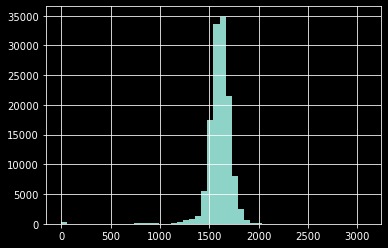

In [25]:
tengyur_df[tengyur_df.text.map(len) < 16512].text.map(len).compute().hist(bins=50)

In [26]:
set(tengyur_df.volume_number.unique().compute().to_list()).symmetric_difference(set(range(1, 214)))

set()

## Split by section

In [27]:
kangyur_bag = KangyurLoader("../../tibert_data/").to_bag(split_type=CorpusSplitType.BY_SECTION)

In [28]:
kangyur_bag.count().compute()

2681983

In [29]:
all_letters = \
    sorted( \
        kangyur_bag \
            .flatten() \
            .distinct() \
            .compute())
' '.join(all_letters)

'༄ ༅ ༈ ་ ༌ ། ༑ ༠ ༡ ༢ ༣ ༤ ༥ ༦ ༧ ༨ ༩ ༼ ༽ ཀ ཁ ག ང ཅ ཆ ཇ ཉ ཊ ཋ ཌ ཎ ཏ ཐ ད དྷ ན པ ཕ བ བྷ མ ཙ ཚ ཛ ཝ ཞ ཟ འ ཡ ར ལ ཤ ཥ ས ཧ ཨ ཀྵ ཪ ཱ ི ུ ེ ཻ ོ ཽ ཾ ཿ ྀ ྂ ྃ ྅ ྈ ྉ ྍ ྎ ྐ ྑ ྒ ྔ ྕ ྗ ྙ ྚ ྛ ྜ ྞ ྟ ྠ ྡ ྣ ྤ ྥ ྦ ྨ ྩ ྪ ྫ ྭ ྰ ྱ ྲ ླ ྴ ྵ ྶ ྷ ྸ ྺ ྻ ྼ'

In [30]:
kangyur_bag.take(20)

('༄༅༅།',
 '།རྒྱ་གར་སྐད་དུ།',
 'བི་ན་ཡ་བསྟུ།',
 'བོད་སྐད་དུ།',
 'འདུལ་བ་གཞི།',
 'བམ་པོ་དང་པོ།',
 'དཀོན་མཆོག་གསུམ་ལ་ཕྱག་འཚལ་ལོ།',
 '།གང་གིས་འཆིང་',
 'རྣམས་ཡང་དག་རབ་བཅད་ཅིང་།',
 '།མུ་སྟེགས་ཚོགས་རྣམས་ཐམས་ཅད་རབ་བཅོམ་སྟེ།',
 '།སྡེ་དང་བཅས་པའི་བདུད་རྣམས་ངེས་བཅོམ་ནས།',
 '།བྱང་ཆུབ་འདི་བརྙེས་དེ་ལ་',
 'ཕྱག་འཚལ་ལོ།',
 '།ཁྱིམ་དོན་ཆེ་ཆུང་སྤངས་ཏེ་དང་པོར་རབ་འབྱུང་དཀའ།',
 '།རབ་བྱུང་ཐོབ་ནས་ཡུལ་སྤྱད་དག་གིས་དགའ་ཐོབ་དཀའ།',
 '།མངོན་དགའ་ཇི་བཞིན་དོན་བསྐྱེད་ཡང་',
 'དག་བྱེད་པ་དཀའ།',
 '།ངུར་སྨྲིག་གོས་འཆང་མཁས་པ་ཚུལ་ལས་ཉམས་པ་དཀའ།',
 '།གཞི་རྣམས་ཀྱི་སྤྱི་སྡོམ་ལ།',
 'རབ་འབྱུང་གསོ་སྦྱོང་གཞི་དང་ནི།')

In [31]:
tengyur_bag = TengyurLoader("../../tibert_data/", test_mode=True) \
    .apply_markup(replace_with_suggested=True) \
    .clean_bad_chars(False) \
    .to_bag(split_type=CorpusSplitType.BY_SECTION)

In [32]:
tengyur_bag.count().compute()

5173272

In [33]:
all_letters = \
    sorted( \
        tengyur_bag \
            .flatten() \
            .distinct() \
            .compute())
' '.join(all_letters)

'\x07 # ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > @ A D E H X [ ] a b e f l m o p r s t x { | } × ं ऽ । ༀ ༄ ༅ ༈ ་ ༌ ། ༑ ༔ ༜ ༠ ༡ ༢ ༣ ༤ ༥ ༦ ༧ ༨ ༩ ༴ ༵ ༷ ༸ ༼ ༽ ཀ ཁ ག གྷ ང ཅ ཆ ཇ ཉ ཊ ཋ ཌ ཌྷ ཎ ཏ ཐ ད དྷ ན པ ཕ བ བྷ མ ཙ ཚ ཛ ཛྷ ཝ ཞ ཟ འ ཡ ར ལ ཤ ཥ ས ཧ ཨ ཀྵ ཪ ཱ ི ཱི ུ ཱུ ྲྀ ླྀ ཹ ེ ཻ ོ ཽ ཾ ཿ ྀ ཱྀ ྂ ྃ ྄ ྅ ྈ ྉ ྊ ྍ ྎ ྐ ྑ ྒ ྒྷ ྔ ྕ ྖ ྗ ྙ ྚ ྛ ྜ ྜྷ ྞ ྟ ྠ ྡ ྡྷ ྣ ྤ ྥ ྦ ྦྷ ྨ ྩ ྪ ྫ ྫྷ ྭ ྯ ྰ ྱ ྲ ླ ྴ ྵ ྶ ྷ ྸ ྐྵ ྺ ྻ ྼ ྾ ‚'

In [34]:
tengyur_bag.filter(lambda x: "@" in x).repartition(1).take(10)

('@(རྟན་,རྟེན་)|རྟེན་@ཞེས་བྱ་བའི་དོན་ཏོ།',
 'འོན་ཀྱང་སྐྱོན་གང་ཡིན་པ་དེ་ཡོན་ཏན་ཉིད་དུ་རྟོགས་པ་ལ་ཞུགས་པ་ཞེས་བྱ་བའི་དོན་@(དོ,ཏོ)|ཏོ@།',
 '།ཁྲོ་བའི་མེ་ཞེས་བྱ་བ་ནི་ཁྲོ་བ་ཉིད་@(མ་,མེ་)|མེ་@དང་འདྲ་བས་ན་ཁྲོ་བའི་མེ་སྟེ།',
 'ཇི་ཙམ་ན་རྔོན་པ་རྒན་པོ་དེ་@{རི་དགས་,རི་དྭགས་}|རི་དྭགས་@བཤོར་བའི་ཕྱིར་ནགས་ཚལ་དུ་ཞུགས་ཏེ།',
 '@{རི་དགས་,རི་དྭགས་}|རི་དྭགས་@བལྟ་བའི་ཕྱིར་སེམས་གཏོད་ཅིང་',
 'མཐེ་བོ་བསྐྱོད་པ་དེ་@{རི་དགས་,རི་དྭགས་}|རི་དྭགས་@ཀྱི་རྣ་བ་འགུལ་བ་ཡིན་ནོ་སྙམ་ནས་མདའ་བསྣུན་པ་དང་།',
 'རྟ་མགྲིན་@{རིངས་,རིང་}|རིང་@ལ་སོགས་མང་པོ་ཞིག་རྒྱ་མཚོ་ལས་བྱུང་བར་གྱུར་པ་དང་།',
 'ཕྱིར་@(ཚིངས་,ཚངས་)|ཚངས་@པ་ཉིད་འདི་ལྟར་སྤྱོད་པའོ།',
 '@{རི་དགས་,རི་དྭགས་}|རི་དྭགས་@སྐྱེས་དང་།',
 'དེ་སྐད་མ་@(གསུང་,གསུངས་)|གསུངས་@ཤིག')

# Figure out how to load the corpora

In [23]:
import re
import unicodedata
import glob

In [24]:
def load_from_filename(fn):
    with open(fn, encoding='utf-8', mode='r') as f:
        return f.read()

In [25]:
def load_with_filename(fn):
    with open(fn, encoding='utf-8', mode='r') as f:
        return (fn, f.read())

## Kangyur

### Load

In [ ]:
kangyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/OpenPecha/P000001/*.txt")) \
    .map(load_from_filename) \
    .map(lambda x: re.sub("[\[\]]", '', x)) \
    .str.split(' ') \
    .flatten() \
    .str.replace('\n', '')
kangyur_bag

In [ ]:
kangyur_bag.take(20)

In [ ]:
kangyur_bag.count().compute()

### Clean-up analyses

In [ ]:
def repl_split_commas_or_kill(match):
    match = match.group(0)
    if ',' in match:
        return match.split(',')[0][1:]
    if '‚' in match:
        return match.split('‚')[0][1:]
    return ''


bad_chars_to_remove = "*`p}1-9\ufeff�‘’"

kangyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/OpenPecha/P000001/*.txt")) \
    .map(load_from_filename) \
    .map(lambda x: re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x)) \
    .map(lambda x: re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x)) \
    .map(lambda x: re.sub("[\[\]{}]".format(bad_chars_to_remove), '', x)) \
    .str.split(' ') \
    .flatten() \
    .str.replace('\n', '')
kangyur_bag

In [ ]:
all_letters = \
    sorted( \
        kangyur_bag \
            .flatten() \
            .distinct() \
            .compute())
' '.join(all_letters)

In [ ]:
[unicodedata.name(c) for c in all_letters]

In [ ]:
to_contain = "‘’"
to_contain, [unicodedata.name(c) for c in to_contain]

In [ ]:
kangyur_bag.filter(lambda x: re.findall('[{}]'.format(to_contain), x)).count().compute()

In [ ]:
kangyur_bag.filter(lambda x: any([c in x for c in to_contain])).repartition(1).to_textfiles("c:/workspace/tibert_data/kangyur_bag_bad_chars_*.txt")

In [ ]:
#     .map(lambda x: (x[0], re.sub("\[[0-9 ]+[ab.0-9]+\]", '', x[1]))) \

kangyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/OpenPecha/P000001/*.txt")) \
    .map(load_with_filename) \
    .map(lambda x: [str((x[0], text)) for text in re.findall("\([^\(\)]*\)", x[1])]) \
    .flatten() \
    .distinct()
kangyur_bag

In [ ]:
kangyur_bag.count().compute()

In [ ]:
kangyur_bag.repartition(1).to_textfiles("c:/workspace/tibert_data/kangyur_bracketed_*.txt")

### Figure out how to split the folios

In [11]:
kangyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/OpenPecha/P000001/*.txt")) \
    .map(load_from_filename)

In [12]:
test_str = kangyur_bag.take(1)[0]

In [97]:
tibetan_digits = ['༠', '༡', '༢', '༣', '༤', '༥', '༦', '༧', '༨', '༩']
tibetan_halves = ['༪', '༫', '༬', '༭', '༮', '༯', '༰', '༱', '༲', '༳']
tibetan_digits, tibetan_halves

(['༠', '༡', '༢', '༣', '༤', '༥', '༦', '༧', '༨', '༩'],
 ['༪', '༫', '༬', '༭', '༮', '༯', '༰', '༱', '༲', '༳'])

In [98]:
def translate_tibetan_number(tibetan_number):
    res = ""
    for digit in tibetan_number:
        res += str(tibetan_digits.index(digit))
    return int(res)

In [40]:
folio_marker_re = re.compile(r"\(([{}]+)([ནབ])་\)".format(''.join(tibetan_digits)))

In [ ]:
for c in tibetan_digits + tibetan_halves:
    print(unicodedata.name(c))

In [ ]:
for match in folio_marker_re.finditer(test_str):
    print(match.span(), translate_tibetan_number(match.group(1)), match.group(2))

In [62]:
def _segment_folios(volume_str):
    res, cur_ref, last_loc = [], None, None
    for match in folio_marker_re.finditer(volume_str):
        cur_loc_start, cur_loc_end = match.span()
        if last_loc is not None:
            res.append((cur_ref, volume_str[last_loc:cur_loc_start]))
        last_loc = cur_loc_end
        cur_ref = "F.{}.{}".format(translate_tibetan_number(match.group(1)), 'a' if match.group(2) == 'ན' else 'b')
    res.append((cur_ref, volume_str[last_loc:]))
    return res

In [ ]:
_segment_folios(test_str)

In [99]:
def repl_split_commas_or_kill(match):
    match = match.group(0)
    if ',' in match:
        return match.split(',')[0][1:]
    if '‚' in match:
        return match.split('‚')[0][1:]
    return ''


# Basic strategy:
#    1. Find all round and curly braces (no curly braces in the Kangyur but inspired by the Tengyur we still do it)
#        a. If there is a comma in the bracketed text, split along comma and take first element (uncorrected)
#        b. If no comma then just kill entire bracketed text (remove comments and mark-up)
#    2. Remove square brackets and leave text inside them (presumed interpolation for damage etc)
#    3. Remove unmatched commas, brackets, stars, the BOM, etc (leaves small number of bad morphemes that are very hard to clean)

# Need to repl_split_commas_or_kill twice because there is some nested round bracketed text, up to depth 2
# There are opening/closing brackets with no matching brackets

bad_chars_to_remove = "*`p}1-9\ufeff�‘’"
space_re = re.compile(r"\s+")

kangyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/OpenPecha/P000001/*.txt")) \
    .map(load_from_filename) \
    .map(_segment_folios) \
    .flatten() \
    .map(lambda x: (x[0], space_re.sub(' ', x[1]).strip())) \
    .map(lambda x: (x[0], re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x[1]))) \
    .map(lambda x: (x[0], re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x[1]))) \
    .map(lambda x: (x[0], re.sub("[\[\]{}]".format(bad_chars_to_remove), '', x[1])))
kangyur_bag

dask.bag<lambda, npartitions=103>

In [100]:
kangyur_bag.count().compute()

65643

In [101]:
kangyur_bag.take(10)

(('F.1.a', ''),
 ('F.1.b',
  '༄༅༅། །རྒྱ་གར་སྐད་དུ། བི་ན་ཡ་བསྟུ། བོད་སྐད་དུ། འདུལ་བ་གཞི། བམ་པོ་དང་པོ། དཀོན་མཆོག་གསུམ་ལ་ཕྱག་འཚལ་ལོ། །གང་གིས་འཆིང་ རྣམས་ཡང་དག་རབ་བཅད་ཅིང་། །མུ་སྟེགས་ཚོགས་རྣམས་ཐམས་ཅད་རབ་བཅོམ་སྟེ། །སྡེ་དང་བཅས་པའི་བདུད་རྣམས་ངེས་བཅོམ་ནས། །བྱང་ཆུབ་འདི་བརྙེས་དེ་ལ་ ཕྱག་འཚལ་ལོ། །ཁྱིམ་དོན་ཆེ་ཆུང་སྤངས་ཏེ་དང་པོར་རབ་འབྱུང་དཀའ། །རབ་བྱུང་ཐོབ་ནས་ཡུལ་སྤྱད་དག་གིས་དགའ་ཐོབ་དཀའ། །མངོན་དགའ་ཇི་བཞིན་དོན་བསྐྱེད་ཡང་ དག་བྱེད་པ་དཀའ། །ངུར་སྨྲིག་གོས་འཆང་མཁས་པ་ཚུལ་ལས་ཉམས་པ་དཀའ། །གཞི་རྣམས་ཀྱི་སྤྱི་སྡོམ་ལ། རབ་འབྱུང་གསོ་སྦྱོང་གཞི་དང་ནི། །དགག་དབྱེ་དབྱར་དང་ཀོ་ ལྤགས་གཞི། །སྨན་དང་གོས་དང་སྲ་བརྐྱང་དང་། །ཀཽ་ཤཱམ་བཱི་དང་ལས་ཀྱི་གཞི། །དམར་སེར་ཅན་དང་གང་ཟག་དང་། །སྤོ་དང་གསོ་སྦྱོང་བཞག་པ་དང་། །གནས་མལ་དང་ནི་'),
 ('F.2.a',
  'རྩོད་པ་དང་། །དགེ་འདུན་དབྱེན་རྣམས་བསྡུས་པ་ཡིན། །རབ་ཏུ་འབྱུང་བའི་གཞིའི་སྤྱི་སྡོམ་ལ། ཤཱ་རིའི་བུ་དང་མུ་སྟེགས་ཅན། །དགེ་ཚུལ་གཉིས་དང་བྱ་རོག་སྐྲོད། །དགྲ་བཅོམ་བསད་དང་ལག་རྡུམ་གྱི། །སྡེ་ཚན་ ཡང་དག་བསྡུས་པ་ཡིན། །སྡོམ་ལ། ཤཱ་རིའི་བུ་དང་རབ་འབྱུང་དང་། །བསྙེན་པར་རྫོགས་པར་གནང་བ་དང་། །ཉེ་སྡེས་ཚོགས་ནི་བསྡུས་པ་དང་། །ལྔ་པའི

### Load clean version split by section

In [102]:
def repl_split_commas_or_kill(match):
    match = match.group(0)
    if ',' in match:
        return match.split(',')[0][1:]
    if '‚' in match:
        return match.split('‚')[0][1:]
    return ''


# Basic strategy:
#    1. Find all round and curly braces (no curly braces in the Kangyur but inspired by the Tengyur we still do it)
#        a. If there is a comma in the bracketed text, split along comma and take first element (uncorrected)
#        b. If no comma then just kill entire bracketed text (remove comments and mark-up)
#    2. Remove square brackets and leave text inside them (presumed interpolation for damage etc)
#    3. Remove unmatched commas, brackets, stars, the BOM, etc (leaves small number of bad morphemes that are very hard to clean)

# Need to repl_split_commas_or_kill twice because there is some nested round bracketed text, up to depth 2
# There are opening/closing brackets with no matching brackets

bad_chars_to_remove = "*`p}1-9\ufeff�‘’"

kangyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/OpenPecha/P000001/*.txt")) \
    .map(load_from_filename) \
    .map(lambda x: re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x)) \
    .map(lambda x: re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x)) \
    .map(lambda x: re.sub("[\[\]{}]".format(bad_chars_to_remove), '', x)) \
    .str.split(' ') \
    .flatten() \
    .str.replace('\n', '')
kangyur_bag

dask.bag<operator.methodcaller('replace', '\n', ''), npartitions=103>

In [105]:
all_letters = \
    sorted( \
        kangyur_bag \
            .flatten() \
            .distinct() \
            .compute())
' '.join(all_letters)

'༄ ༅ ༈ ་ ༌ ། ༑ ༠ ༡ ༢ ༣ ༤ ༥ ༦ ༧ ༨ ༩ ༼ ༽ ཀ ཁ ག ང ཅ ཆ ཇ ཉ ཊ ཋ ཌ ཎ ཏ ཐ ད དྷ ན པ ཕ བ བྷ མ ཙ ཚ ཛ ཝ ཞ ཟ འ ཡ ར ལ ཤ ཥ ས ཧ ཨ ཀྵ ཪ ཱ ི ུ ེ ཻ ོ ཽ ཾ ཿ ྀ ྂ ྃ ྅ ྈ ྉ ྍ ྎ ྐ ྑ ྒ ྔ ྕ ྗ ྙ ྚ ྛ ྜ ྞ ྟ ྠ ྡ ྣ ྤ ྥ ྦ ྨ ྩ ྪ ྫ ྭ ྰ ྱ ྲ ླ ྴ ྵ ྶ ྷ ྸ ྺ ྻ ྼ'

In [106]:
kangyur_bag.count().compute()

2254177

In [107]:
kangyur_bag.take(20)

('༄༅༅།',
 '།རྒྱ་གར་སྐད་དུ།',
 'བི་ན་ཡ་བསྟུ།',
 'བོད་སྐད་དུ།',
 'འདུལ་བ་གཞི།',
 'བམ་པོ་དང་པོ།',
 'དཀོན་མཆོག་གསུམ་ལ་ཕྱག་འཚལ་ལོ།',
 '།གང་གིས་འཆིང་རྣམས་ཡང་དག་རབ་བཅད་ཅིང་།',
 '།མུ་སྟེགས་ཚོགས་རྣམས་ཐམས་ཅད་རབ་བཅོམ་སྟེ།',
 '།སྡེ་དང་བཅས་པའི་བདུད་རྣམས་ངེས་བཅོམ་ནས།',
 '།བྱང་ཆུབ་འདི་བརྙེས་དེ་ལ་ཕྱག་འཚལ་ལོ།',
 '།ཁྱིམ་དོན་ཆེ་ཆུང་སྤངས་ཏེ་དང་པོར་རབ་འབྱུང་དཀའ།',
 '།རབ་བྱུང་ཐོབ་ནས་ཡུལ་སྤྱད་དག་གིས་དགའ་ཐོབ་དཀའ།',
 '།མངོན་དགའ་ཇི་བཞིན་དོན་བསྐྱེད་ཡང་དག་བྱེད་པ་དཀའ།',
 '།ངུར་སྨྲིག་གོས་འཆང་མཁས་པ་ཚུལ་ལས་ཉམས་པ་དཀའ།',
 '།གཞི་རྣམས་ཀྱི་སྤྱི་སྡོམ་ལ།',
 'རབ་འབྱུང་གསོ་སྦྱོང་གཞི་དང་ནི།',
 '།དགག་དབྱེ་དབྱར་དང་ཀོ་ལྤགས་གཞི།',
 '།སྨན་དང་གོས་དང་སྲ་བརྐྱང་དང་།',
 '།ཀཽ་ཤཱམ་བཱི་དང་ལས་ཀྱི་གཞི།')

## Tengyur

### Clean-up analyses

#### Square bracketed text

In [ ]:
tengyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/derge-tengyur/text/*.txt")) \
    .map(load_with_filename) \
    .map(lambda x: (x[0], re.sub("\[[0-9 ]+[ab.0-9]+\]", '', x[1]))) \
    .map(lambda x: [str((x[0], text)) for text in re.findall("\[[^\[\]]*\]", x[1])]) \
    .flatten() \
    .distinct()
tengyur_bag

In [ ]:
tengyur_bag.count().compute()

In [ ]:
tengyur_bag.repartition(1).to_textfiles("c:/workspace/tibert_data/tengyur_square_bracketed_*.txt")

PLAN: Drop the headings, then drop the brackets and leave the remaining bracketed text where it is

#### # sign - safe to remove?

In [ ]:
tengyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/derge-tengyur/text/*.txt")) \
    .map(load_from_filename) \
    .str.split(' ') \
    .flatten() \
    .str.replace('\n', '') \
    .filter(lambda x: '#' in x)
tengyur_bag

In [ ]:
tengyur_bag.count().compute()

In [ ]:
tengyur_bag.repartition(1).to_textfiles("c:/workspace/tibert_data/tengyur_hashtag_*.txt")

Remove the # sign

#### Round or curly brackets

In [ ]:
tengyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/derge-tengyur/text/*.txt")) \
    .map(load_from_filename) \
    .map(lambda x: re.findall("[({][^(){}]*?[})]", x)) \
    .flatten() \
    .distinct()
tengyur_bag

In [ ]:
tengyur_bag.count().compute()

In [ ]:
tengyur_bag.repartition(1).to_textfiles("c:/workspace/tibert_data/tengyur_round_or_curly_*.txt")

In [ ]:
tengyur_bag = db \
    .read_text("../../tibert_data/derge-tengyur/text/*.txt") \
    .filter(lambda x: '(' in x)

In [ ]:
tengyur_bag.count().compute()

In [ ]:
test_str = " ".join(tengyur_bag.take(2))
test_str

In [ ]:
def repl_get_first_elem(matchobj):
#     print(matchobj.group(0))
#     print(matchobj.group(1))
#     print(matchobj.group(2))
    return matchobj.group(1)

print(test_str)

re.sub("\(([^,]*),([^,]*)\)", repl_get_first_elem, test_str)

In [ ]:
tengyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/derge-tengyur/text/*.txt")) \
    .map(load_from_filename) \
    .map(lambda x: re.findall("\([^,]*,[^,]*\)", x)) \
    .flatten() \
    .distinct()

In [ ]:
tengyur_bag.map(len).max().compute()

In [ ]:
tengyur_bag.fold(lambda x, y: y if len(x) < len(y) else x).compute()

In [ ]:
def repl_get_first_elem(matchobj):
    return matchobj.group(1)


tengyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/derge-tengyur/text/*.txt")) \
    .map(load_from_filename) \
    .map(lambda x: re.sub("\(([^,]*),([^,]*)\)", repl_get_first_elem, x)) \
    .map(lambda x: re.sub("\(([^,]*)‚([^,]*)\)", repl_get_first_elem, x)) \
    .map(lambda x: re.findall(",[^,]*?[)}]", x)) \
    .flatten() \
    .distinct()


#     .map(lambda x: re.findall("\([^\(\)]*\)", x)) \

#     .str.split(' ') \
#     .flatten() \
#     .str.replace('\n', '')
tengyur_bag

In [ ]:
tengyur_bag.count().compute()

In [ ]:
tengyur_bag.repartition(1).take(200)

In [ ]:
tengyur_bag.map(len).compute()

In [ ]:
remaining_stuff = tengyur_bag.filter(lambda x: '(' in x).compute()
len(remaining_stuff)

In [ ]:
remaining_stuff

In [ ]:
def repl_get_first_elem(matchobj):
#     print(matchobj.group(0))
#     print(matchobj.group(1))
#     print(matchobj.group(2))
    return matchobj.group(1)

print(remaining_stuff[6])

re.sub("\(([^,]*),([^,]*)\)", repl_get_first_elem, remaining_stuff[6])

In [ ]:
unicodedata.name('‚')

In [ ]:
def repl_split_commas_or_kill(x):
    if ',' in x:
        return x + '|' + x.split(',')[0]
    if '‚' in x:
        return x + '|' + x.split('‚')[0]
    return x + '|' + ''


tengyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/derge-tengyur/text/*.txt")) \
    .map(load_from_filename) \
    .map(lambda x: re.findall("[({][^(){}]*?[})]", x)) \
    .flatten() \
    .map(repl_split_commas_or_kill) \
    .distinct()
tengyur_bag

In [ ]:
tengyur_bag.count().compute()

In [ ]:
tengyur_bag.map(len).max().compute()

In [ ]:
tengyur_bag.repartition(1).to_textfiles("c:/workspace/tibert_data/tengyur_round_or_curly_treatment_*.txt")

PLAN: Find all text in round or curly braces, split all comma and take first element if there is a comma, otherwise kill

In [ ]:
def repl_split_commas_or_kill(match):
    match = match.group(0)
    if ',' in match:
        return match.split(',')[0][1:]
    if '‚' in match:
        return match.split('‚')[0][1:]
    return ''


tengyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/derge-tengyur/text/*.txt")) \
    .map(load_from_filename) \
    .map(lambda x: re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x)) \
    .map(lambda x: re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x)) \
    .map(lambda x: re.sub("\[[0-9 ]+[ab.0-9]+\]", '', x)) \
    .map(lambda x: re.sub("[\[\]#]", '', x)) \
    .str.split(' ') \
    .flatten() \
    .str.replace('\n', '')
tengyur_bag

In [ ]:
tengyur_bag.count().compute()

In [ ]:
tengyur_bag.filter(lambda x: '(' in x or ')' in x).count().compute()

In [ ]:
tengyur_bag.filter(lambda x: '[' in x or ']' in x or '#' in x or '(' in x or ')' in x).count().compute()

In [ ]:
tengyur_bag.filter(lambda x: '[' in x or ']' in x or '#' in x or '(' in x or ')' in x).map(len).max().compute()

In [ ]:
all_bads = tengyur_bag.filter(lambda x: '[' in x or ']' in x or '#' in x or '(' in x or ')' in x).repartition(1).take(100)
all_bads

In [ ]:
def repl_split_commas_or_kill(match):
    match = match.group(0)
    if ',' in match:
        return match.split(',')[0][1:]
    if '‚' in match:
        return match.split('‚')[0][1:]
    return ''


[(x, re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x)) for x in all_bads]

### Figure out how to split the folios

In [26]:
tengyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/derge-tengyur/text/*.txt")) \
    .map(load_from_filename)

In [27]:
test_str = tengyur_bag.take(1)[0]

In [29]:
folio_marker_re = re.compile(r"\[([\d]+)([ab])\]")

In [32]:
def _segment_folios(volume_str):
    res, cur_ref, last_loc = [], None, None
    for match in folio_marker_re.finditer(volume_str):
        cur_loc_start, cur_loc_end = match.span()
        if last_loc is not None:
            res.append((cur_ref, volume_str[last_loc:cur_loc_start]))
        last_loc = cur_loc_end
        cur_ref = "F.{}.{}".format(match.group(1), match.group(2))
    res.append((cur_ref, volume_str[last_loc:]))
    return res

In [ ]:
_segment_folios(test_str)

In [36]:
def repl_split_commas_or_kill(match):
    match = match.group(0)
    if ',' in match:
        return match.split(',')[0][1:]
    if '‚' in match:
        return match.split('‚')[0][1:]
    return ''


# Basic strategy:
#    1. Find all round and curly braces
#        a. If there is a comma in the bracketed text, split along comma and take first element (uncorrected)
#        b. If no comma then just kill entire bracketed text (remove comments and mark-up)
#    2. Remove text of the form NNNab.NNN where N are numebrs inside square brackets (section/folio/work/etc numbering)
#    3. Remove square brackets and leave text inside them (presumed interpolation for damage etc)
#    4. Remove hashtags (mark-up and comments)
#    5. Remove unmatched commas, brackets, stars, and the BOM (leaves small number of bad morphemes that are very hard to clean)

# Need to repl_split_commas_or_kill twice because there is some nested round bracketed text, up to depth 2
# There are opening/closing brackets with no matching brackets

bad_chars_to_remove = "\ufeff\x07\t+./0-9:;<=>A-Za-z{×"
space_re = re.compile(r"\s+")


tengyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/derge-tengyur/text/*.txt")) \
    .map(load_from_filename) \
    .map(_segment_folios) \
    .flatten() \
    .map(lambda x: (x[0], space_re.sub(' ', x[1]).strip())) \
    .map(lambda x: (x[0], re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x[1]))) \
    .map(lambda x: (x[0], re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x[1]))) \
    .map(lambda x: (x[0], re.sub("\[[0-9 ]+[ab.0-9]+\]", '', x[1]))) \
    .map(lambda x: (x[0], re.sub("[\[\]#\(\),*{}]".format(bad_chars_to_remove), '', x[1])))
tengyur_bag

dask.bag<lambda, npartitions=107>

In [ ]:
tengyur_bag.take(10)

In [39]:
tengyur_bag.count().compute()

128626

In [42]:
tengyur_bag.map(lambda args: len(args[1])).max().compute()

16512

### Load and preprocess split by section

In [17]:
def repl_split_commas_or_kill(match):
    match = match.group(0)
    if ',' in match:
        return match.split(',')[0][1:]
    if '‚' in match:
        return match.split('‚')[0][1:]
    return ''


# Basic strategy:
#    1. Find all round and curly braces
#        a. If there is a comma in the bracketed text, split along comma and take first element (uncorrected)
#        b. If no comma then just kill entire bracketed text (remove comments and mark-up)
#    2. Remove text of the form NNNab.NNN where N are numebrs inside square brackets (section/folio/work/etc numbering)
#    3. Remove square brackets and leave text inside them (presumed interpolation for damage etc)
#    4. Remove hashtags (mark-up and comments)
#    5. Remove unmatched commas, brackets, stars, and the BOM (leaves small number of bad morphemes that are very hard to clean)

# Need to repl_split_commas_or_kill twice because there is some nested round bracketed text, up to depth 2
# There are opening/closing brackets with no matching brackets

bad_chars_to_remove = "\ufeff\x07\t+./0-9:;<=>A-Za-z{×"

tengyur_bag = db \
    .from_sequence(glob.glob("../../tibert_data/derge-tengyur/text/*.txt")) \
    .map(load_from_filename) \
    .map(lambda x: re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x)) \
    .map(lambda x: re.sub("[({][^(){}]*?[})]", repl_split_commas_or_kill, x)) \
    .map(lambda x: re.sub("\[[0-9 ]+[ab.0-9]+\]", '', x)) \
    .map(lambda x: re.sub("[\[\]#\(\),*{}]".format(bad_chars_to_remove), '', x)) \
    .str.split(' ') \
    .flatten() \
    .str.replace('\n', '')
tengyur_bag

dask.bag<operator.methodcaller('replace', '\n', ''), npartitions=107>

In [18]:
tengyur_bag.take(20)

('༄༅༅།',
 '།རྒྱ་གར་སྐད་དུ།',
 'བི་ཤིཥྚ་སྟ་བཿ།',
 'བོད་སྐད་དུ།',
 'ཁྱད་པར་དུ་འཕགས་པའི་བསྟོད་པ།',
 'དེ་བཞིན་གཤེགས་པ་ཐམས་ཅད་ལ་ཕྱག་འཚལ་ལོ།',
 '།བདག་ནི་སྟོན་པ་གཞན་སྤངས་ནས།',
 '།བཅོམ་ལྡན་ཁྱོད་ལ་སྐྱབས་མཆིས་པ།',
 '།དེ་ཅིའི་སླད་དུ་ཞེ་ན་ཁྱོད།',
 '།སྐྱོན་མི་མངའ་ལ་ཡོན་ཏན་ལྡན།',
 '།གང་ཕྱིར་འཇིག་རྟེན་སྐྱོན་ལ་དགའ།',
 '།ཡོན་ཏན་འཛིན་པར་ཞེན་པས་ན།',
 '།སྐྱོན་ཡང་ཡོན་ཏན་ལྟར་མཐོང་ནས།',
 '།གཞན་ལ་སྐྱབས་སུ་མཆིས་པར་གྱུར།',
 '།ཁྱབ་འཇུག་དབང་ཕྱུག་ལ་སོགས་པ།',
 '།དེ་ལ་སྐྱེ་བོ་དགའ་དད་པས།',
 '།དེ་ཡི་ཡོན་ཏན་གང་བསྒྲགས་པ།',
 '།ཁྱོད་ཀྱི་བསྟན་ལ་དེ་དག་སྐྱོན།',
 '།ལྷ་ཆེན་ཁྲོས་པའི་མདའ་གཅིག་གིས།',
 '།གྲོང་ཁྱེར་སུམ་བརྩེགས་བསྲེགས་ཞེས་གདའ།')

In [19]:
tengyur_bag.count().compute()

4320913

In [ ]:
tengyur_bag.filter(lambda x: '[' in x or ']' in x or '#' in x or '(' in x or ')' in x).repartition(1).take(100)

In [ ]:
all_letters = \
    sorted( \
        tengyur_bag \
            .flatten() \
            .distinct() \
            .compute())
' '.join(all_letters)

In [ ]:
[unicodedata.name(c) for c in all_letters]

In [ ]:
to_contain = "a-z"
to_contain

In [ ]:
tengyur_bag.filter(lambda x: re.findall('[{}]'.format(to_contain), x)).count().compute()

In [ ]:
tengyur_bag.filter(lambda x: any([c in x for c in to_contain])).repartition(1).to_textfiles("c:/workspace/tibert_data/tengyur_bad_chars_*.txt")

# Basic analyses

In [ ]:
to_analyze = tengyur_bag

## Lengths of sections

In [ ]:
to_analyze.map(len).max().compute()

In [ ]:
pd \
    .DataFrame(
        to_analyze \
            .map(len) \
            .frequencies() \
            .compute(),
        columns=["len", "count"]) \
    .set_index("len") \
    .sort_index() \
    .plot(logy=True)

In [ ]:
to_analyze.fold(lambda x, y: x if len(x) > len(y) else y).compute()

## Letters

In [ ]:
all_letters = to_analyze \
    .flatten() \
    .distinct() \
    .compute()
len(all_letters)

In [ ]:
' '.join(sorted(all_letters))

### Find specific letter combinations

In [ ]:
import re
import unicodedata

#### Special characters

In [ ]:
special_chars = '*,`p‘’\ufeff�'
special_chars

In [ ]:
to_analyze \
    .filter(lambda x: any([special_char in x for special_char in special_chars])) \
    .distinct() \
    .compute()

#### Parentheses

In [ ]:
to_find = ['[', ']']

In [ ]:
found_blocks = to_analyze \
    .filter(lambda x: re.search("[{}]+".format(''.join(to_find)), x)) \
    .map(lambda x: re.findall("\{}.*?\{}".format(*to_find), x)) \
    .flatten() \
    .distinct() \
    .compute()

In [ ]:
len(found_blocks)

In [ ]:
for block in found_blocks: # [block for block in found_blocks if ',' in block]:
    print(block, [unicodedata.name(char).replace('TIBETAN ', '') for char in block], '\n')

## Morphemes

In [ ]:
tshegs = [
    "\N{TIBETAN MARK INTERSYLLABIC TSHEG}",
    "\N{TIBETAN MARK DELIMITER TSHEG BSTAR}",
    "\N{TIBETAN SIGN RNAM BCAD}",
    "\N{TIBETAN SIGN RJES SU NGA RO}"]

In [ ]:
morphemes = to_analyze \
    .map(lambda x: re.split("[{}]+".format(''.join(tshegs)), x)) \
    .flatten() \
    .distinct()

In [ ]:
morphemes.count().compute()

In [ ]:
sorted(
    morphemes.map(len).frequencies().compute(),
    key=lambda x: x[0])

In [ ]:
long_morpheme = morphemes.fold(lambda x, y: x if len(x) > len(y) else y).compute()
long_morpheme

In [ ]:
long_morpheme, [(char, unicodedata.name(char).replace('TIBETAN ', '')) for char in long_morpheme]